# Tugas Pratikum

Import Library

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

Import & show data dari dataset

In [6]:
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Encoding nilai sex, smoker dan region

In [7]:
le = LabelEncoder() # membuat objek dari LabelEncoder
dataset['sex'] = le.fit_transform(dataset['sex']) # proses encoding
dataset['smoker'] = le.fit_transform(dataset['smoker']) 
dataset['region'] = le.fit_transform(dataset['region']) #

* dilakukan proses encoding agar data diubah menjadi numerik agar data bisa dilakukan operasi

Show dataset

In [8]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Menghilangkan spasi di nama kolom

In [9]:
dataset.columns = dataset.columns.str.strip()
print(dataset.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


* Menghilangkan spasi di nama kolom difungsikan saat identifikasi variable bersifat key sensitive, sehingga nama variable harus ditulis benar besar kecilnya

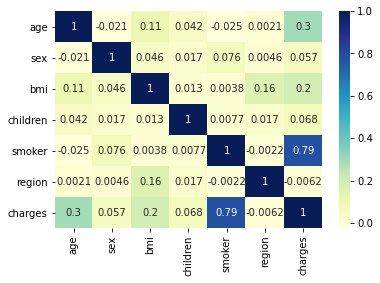

In [10]:
# menampilkan korelasi antar data menggunakan heatmap
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()

Berdasarkan korelasi diatas terdapat 3 variabel yang sangat berkorelasi dengaan target(charges) yaitu smoker, age, dan bmi.

<Figure size 432x288 with 0 Axes>

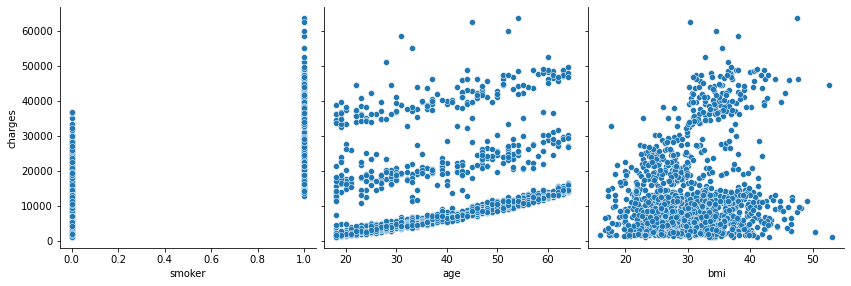

In [13]:
# Menampilkan persebaran fitur terhadap target
fig = plt.figure()
sns.pairplot(dataset, x_vars=['smoker','age','bmi'],
             y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

* Dari visualisasi diatas dapat diketahui jika smoker berpengaruh dengan charges yang semakin tinggi, sedangkan age memiliki korelasi linear cukup kuat dengan charges. Sedangkan BMI cukup merata namun sebagian charges lebih tinggi pada bmi 30 - 40.

# Tugas 1: Multiple Linear Regression

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal) 
2. bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [11]:
# Pembagian data latih dan data uji dengan proporsi 8:2
from sklearn.model_selection import train_test_split

# variabel bebas
x = dataset[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# varibel target
y = dataset['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

3. Lakukan feature scaling jika diperlukan

# Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Mengonversi objek Series 'y' menjadi array numpy
y = y.values.reshape(-1, 1) #mengubah data dari 1D menjadi 2D dengan 1 kolom

# Feature Scaling
sc_x = StandardScaler()
sc_y = StandardScaler()
x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y)

4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [ ]:
# Mengonversi objek Series 'y' menjadi array numpy
y = y.values.reshape(-1, 1) #mengubah data dari 1D menjadi 2D dengan 1 kolom

5. Latih model pada data latih dan lakukan prediksi pada data uji.

# Melatih model data latih

In [ ]:
# Membuat objek model regresi linear
modelRegresi = LinearRegression()

# Melatih data latih
modelRegresi.fit(x_train, y_train)

LinearRegression()

# Visualisasi Prediksi Data Uji

In [ ]:
# Melakukan prediksi pada data uji
y_pred = modelRegresi.predict(x_test)

a. Scatter Polt

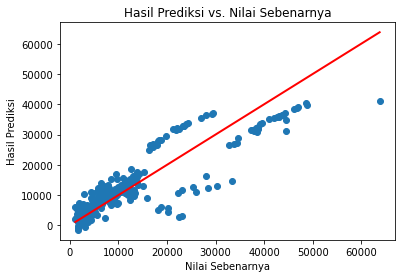

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Hasil Prediksi")
plt.title("Hasil Prediksi vs. Nilai Sebenarnya")

# Menambahkan garis regresi (garis dengan kemiringan 45 derajat)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', lw=2)

plt.show()

# Prediksi Data Uji

In [ ]:
# Mencetak beberapa hasil prediksi
for i in range(10):  # Cetak 10 hasil prediksi pertama
    print(f"Prediksi ke-{i+1}: {y_pred[i]}")

Prediksi ke-1: 8924.407244424498
Prediksi ke-2: 7116.295017576371
Prediksi ke-3: 36909.013521437264
Prediksi ke-4: 9507.874691179592
Prediksi ke-5: 27013.35000789626
Prediksi ke-6: 10790.779561528603
Prediksi ke-7: 226.29844570865316
Prediksi ke-8: 16942.715999411615
Prediksi ke-9: 1056.6307940730312
Prediksi ke-10: 11267.91997309122


6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

# Melatih (SVR)   

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x, y)

c:\Users\WINDOWS 10\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [ ]:
from sklearn.svm import SVR

# Inisialisasi model SVR
svr_model = SVR(kernel='rbf')  # Anda dapat memilih kernel yang sesuai dengan data Anda

# Melatih model SVR menggunakan data latih yang telah di-scale
svr_model.fit(X, y)

# Membuat prediksi dengan model SVR
y_pred_svr = svr_model.predict(X)

c:\Users\WINDOWS 10\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Visualisasi SVR

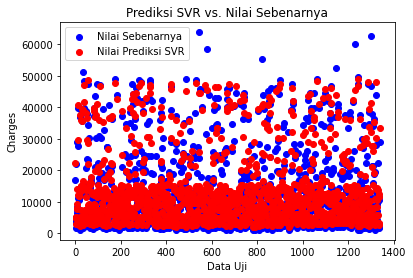

In [ ]:
# Invers scaling untuk hasil prediksi dan nilai sebenarnya
y_pred_original = sc_y.inverse_transform(y_pred_svr)
y_test_original = sc_y.inverse_transform(y)

# Plot hasil prediksi vs. nilai sebenarnya
plt.scatter(range(len(y_test_original)), y_test_original, color='blue', label='Nilai Sebenarnya')
plt.scatter(range(len(y_pred_original)), y_pred_original, color='red', label='Nilai Prediksi SVR')
plt.title('Prediksi SVR vs. Nilai Sebenarnya')
plt.xlabel('Data Uji')
plt.ylabel('Charges')
plt.legend()
plt.show()

# Evaluasi Model SVR

In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y 
y_pred = regressor.predict(X)

# Menghitung R-squared
r_squared = r2_score(y_actual, y_pred)
print("R-squared:", r_squared)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)
print("Mean Squared Error (MSE):", mse)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)
print("Mean Absolute Error (MAE):", mae)

R-squared: 0.8580074170742829
Mean Squared Error (MSE): 0.14199258292571712
Mean Absolute Error (MAE): 0.2012858673534939


* Mean Squared Error (MSE): Mean Squared Error adalah metrik yang digunakan untuk mengukur seberapa dekat rata-rata dari kuadrat perbedaan antara nilai yang diprediksi (y_pred) dan nilai yang sebenarnya (y_actual). MSE menghitung rata-rata dari selisih kuadrat antara nilai prediksi dan nilai sebenarnya. Semakin rendah nilai MSE, semakin baik performa model.

* Mean Absolute Error (MAE): Mean Absolute Error adalah metrik yang digunakan untuk mengukur seberapa dekat rata-rata dari perbedaan absolut antara nilai yang diprediksi (y_pred) dan nilai yang sebenarnya (y_actual). MAE menghitung rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. MAE sering digunakan untuk mengukur kesalahan prediksi dalam skala yang sama dengan variabel target. Semakin rendah nilai MAE, semakin baik performa model.

* R-squared (R^2): R-squared, juga dikenal sebagai koefisien determinasi, adalah metrik yang digunakan untuk mengukur seberapa baik variabilitas dalam variabel target (y_actual) dapat dijelaskan oleh model. Nilai R-squared berkisar antara 0 dan 1. Nilai 1 menunjukkan bahwa model secara sempurna menjelaskan variabilitas data, sedangkan nilai 0 menunjukkan bahwa model tidak menjelaskan variabilitas data sama sekali. Semakin tinggi nilai R-squared, semakin baik performa model